In [42]:
import warnings
warnings.filterwarnings('ignore')

import os
import random
import pathlib
# reduce warnings overload from Tensorflow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print('Using Tensorflow version ', tf.__version__)
from tensorflow import keras
%matplotlib inline

import kr_helper_funcs as kru

seed = kru.seed_all(41)
kru.setupScilab()


Using Tensorflow version  2.10.0


In [43]:
def sigmoid(z):
   return 1.0 / (1.0 + np.exp(-z)) 

def tanh(z):
   return (np.exp(z) - np.exp(-z))/(np.exp(z) + np.exp(-z))   

relu = lambda z :  np.maximum(0, z)

leakyrelu = lambda a, z : np.where(z > 0, z,  z * a) 

In [44]:
x = np.linspace(-5, 5, 5000)
y = sigmoid(x)
y1 = tanh(x)
y2 = relu(x)
y3 = leakyrelu(0.05, x)

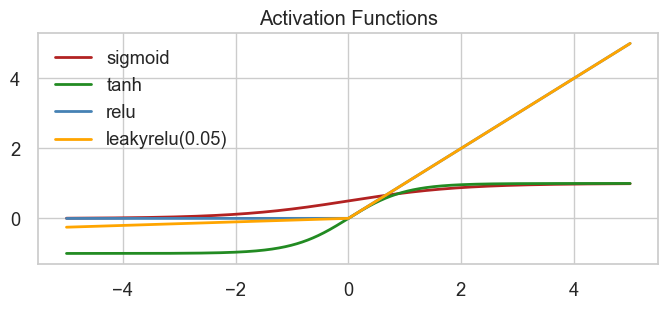

In [45]:
plt.figure(figsize=(8, 3))
plt.plot(x, y, lw=2, c="firebrick", label="sigmoid")
plt.plot(x, y1, lw=2, c="forestgreen", label="tanh")
plt.plot(x, y2, lw=2, c="steelblue", label="relu")
plt.plot(x, y3, lw=2, c="orange", label=f"leakyrelu({0.05})")
plt.title("Activation Functions")
plt.legend(loc="best");

## MNIST Classification with an ANN

In [46]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"X_train.shape {X_train.shape} - y_train.shape: {y_train.shape} - "
      f"X_test.shape {X_test.shape} - y_test.shape: {y_test.shape} - ")

X_train.shape (60000, 28, 28) - y_train.shape: (60000,) - X_test.shape (10000, 28, 28) - y_test.shape: (10000,) - 


In [47]:
IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS, NUM_CLASSES = 28, 28, 1, 10
NUM_EPOCHS, BATCH_SIZE, VAL_SPLIT, LEARNING_RATE = 200, 128, 0.2, 1e-2

In [48]:
# normalize X & one-hot-encode y
X_train = X_train.reshape(X_train.shape[0], IMAGE_HEIGHT * IMAGE_WIDTH * NUM_CHANNELS)
X_test = X_test.reshape(X_test.shape[0], IMAGE_HEIGHT * IMAGE_WIDTH * NUM_CHANNELS)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
print(f"X_train.shape {X_train.shape} - y_train.shape: {y_train.shape} - "
      f"X_test.shape {X_test.shape} - y_test.shape: {y_test.shape} - ")

X_train.shape (60000, 784) - y_train.shape: (60000, 10) - X_test.shape (10000, 784) - y_test.shape: (10000, 10) - 


In [49]:
# build our model
def build_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(
            NUM_CLASSES, activation="softmax",
            input_shape=(IMAGE_HEIGHT * IMAGE_WIDTH * NUM_CHANNELS,)
        )
    ])
    model.compile(
        loss="categorical_crossentropy", optimizer="adam",
        metrics=["accuracy", kru.f1_score]
    )
    return model

In [50]:
model = build_model()
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


In [51]:
# train the model
hist = model.fit(
    X_train, y_train, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, 
    validation_split=VAL_SPLIT
)

Epoch 1/200
375/375 [==============================] - 2s 4ms/step - loss: 0.7454 - accuracy: 0.8161 - f1_score: 0.7018 - val_loss: 0.4099 - val_accuracy: 0.8957 - val_f1_score: 0.8840
Epoch 2/200
375/375 [==============================] - 1s 4ms/step - loss: 0.3909 - accuracy: 0.8953 - f1_score: 0.8899 - val_loss: 0.3357 - val_accuracy: 0.9100 - val_f1_score: 0.9064
Epoch 3/200
375/375 [==============================] - 1s 3ms/step - loss: 0.3391 - accuracy: 0.9064 - f1_score: 0.9054 - val_loss: 0.3091 - val_accuracy: 0.9148 - val_f1_score: 0.9143
Epoch 4/200
375/375 [==============================] - 1s 4ms/step - loss: 0.3153 - accuracy: 0.9121 - f1_score: 0.9121 - val_loss: 0.2960 - val_accuracy: 0.9181 - val_f1_score: 0.9186
Epoch 5/200
375/375 [==============================] - 1s 4ms/step - loss: 0.3009 - accuracy: 0.9162 - f1_score: 0.9161 - val_loss: 0.2838 - val_accuracy: 0.9207 - val_f1_score: 0.9204
Epoch 6/200
375/375 [==============================] - 1s 4ms/step - loss: 

['loss', 'accuracy', 'f1_score']


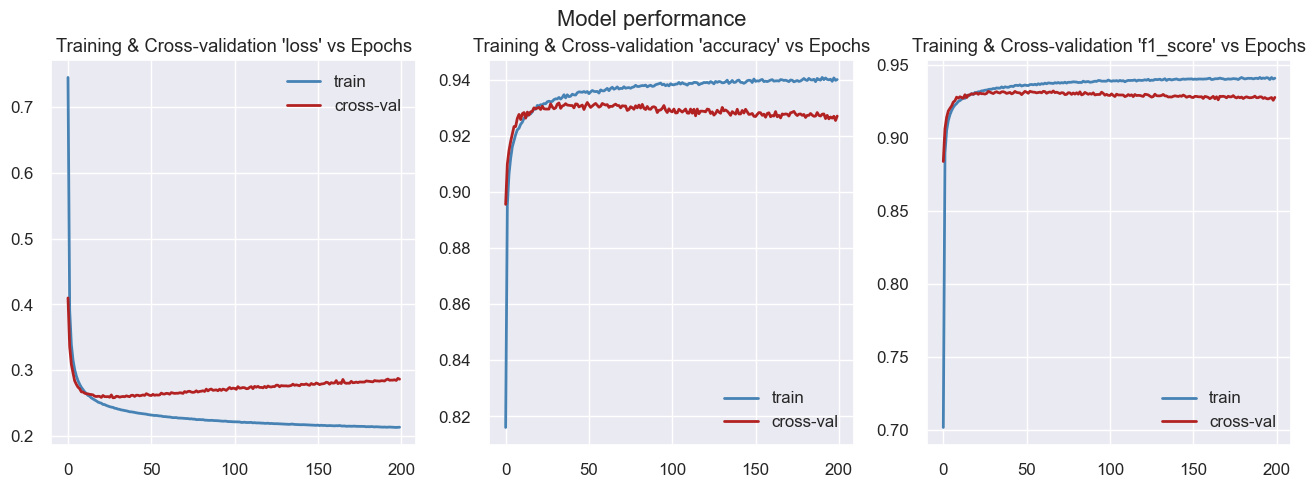

In [52]:
# kru.show_plots(hist.history, metric="accuracy", plot_title="Model Performance")
kru.plot_metrics(hist.history, title="Model performance")

In [53]:
loss, acc, f1 = model.evaluate(X_train, y_train)
print(f"  Training data -> loss: {loss:.4f} - acc: {acc:.4f} - f1_score: {f1:.4f}")
loss, acc, f1 = model.evaluate(X_test, y_test)
print(f"  Testing data -> loss: {loss:.4f} - acc: {acc:.4f} - f1_score: {f1:.4f}")

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2252 - accuracy: 0.9376 - f1_score: 0.9386
  Training data -> loss: 0.2252 - acc: 0.9376 - f1_score: 0.9386
313/313 [==============================] - 1s 2ms/step - loss: 0.3005 - accuracy: 0.9250 - f1_score: 0.9249
  Testing data -> loss: 0.3005 - acc: 0.9250 - f1_score: 0.9249


>Configuration | Epochs | Training Acc | Test Acc 
>:---|:---:|:---:|:---:|
>**Base Model**|200|93.86%|92.49%

Now let's add some more layers to the network & repeat the training

In [62]:
N_HIDDEN = 128

In [63]:
# build our model
def build_model2():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(
            N_HIDDEN, activation="relu", name="dense1",
            input_shape=(IMAGE_HEIGHT * IMAGE_WIDTH * NUM_CHANNELS,)
        ),
        tf.keras.layers.Dense(
            N_HIDDEN, activation="relu", name="dense2"
        ),
        tf.keras.layers.Dense(
            NUM_CLASSES, activation="softmax", name="out"
        ),
    ])
    model.compile(
        loss="categorical_crossentropy", optimizer="adam",
        metrics=["accuracy", kru.f1_score]
    )
    return model

In [64]:
model2 = build_model2()
print(model2.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              (None, 128)               100480    
                                                                 
 dense2 (Dense)              (None, 128)               16512     
                                                                 
 out (Dense)                 (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


In [65]:
# train the model
hist = model2.fit(
    X_train, y_train, epochs=60, batch_size=BATCH_SIZE, 
    validation_split=VAL_SPLIT
)

Epoch 1/60
375/375 [==============================] - 3s 5ms/step - loss: 0.3579 - accuracy: 0.8970 - f1_score: 0.8754 - val_loss: 0.1709 - val_accuracy: 0.9506 - val_f1_score: 0.9513
Epoch 2/60
375/375 [==============================] - 2s 4ms/step - loss: 0.1464 - accuracy: 0.9565 - f1_score: 0.9566 - val_loss: 0.1281 - val_accuracy: 0.9620 - val_f1_score: 0.9615
Epoch 3/60
375/375 [==============================] - 2s 5ms/step - loss: 0.1034 - accuracy: 0.9683 - f1_score: 0.9689 - val_loss: 0.1035 - val_accuracy: 0.9688 - val_f1_score: 0.9694
Epoch 4/60
375/375 [==============================] - 2s 4ms/step - loss: 0.0774 - accuracy: 0.9767 - f1_score: 0.9770 - val_loss: 0.1028 - val_accuracy: 0.9685 - val_f1_score: 0.9691
Epoch 5/60
375/375 [==============================] - 1s 4ms/step - loss: 0.0604 - accuracy: 0.9821 - f1_score: 0.9821 - val_loss: 0.0913 - val_accuracy: 0.9734 - val_f1_score: 0.9736
Epoch 6/60
375/375 [==============================] - 1s 4ms/step - loss: 0.0486

['loss', 'accuracy', 'f1_score']


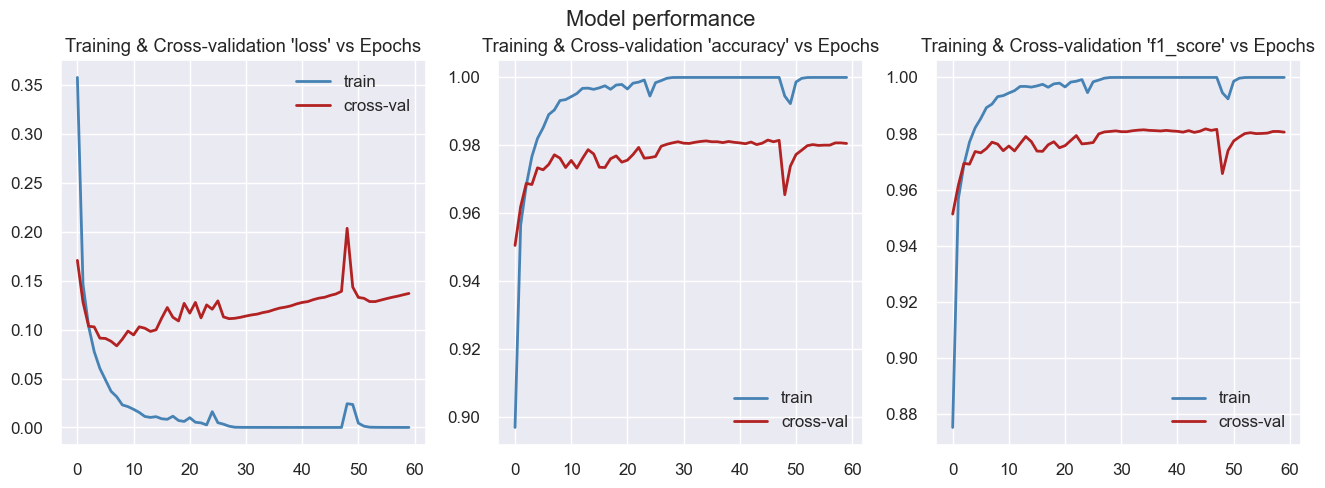

In [66]:
kru.plot_metrics(hist.history, title="Model performance")

In [68]:
loss, acc, f1 = model2.evaluate(X_train, y_train)
print(f"  Training data -> loss: {loss:.4f} - acc: {acc:.4f} - f1_score: {f1:.4f}")
loss, acc, f1 = model2.evaluate(X_test, y_test)
print(f"  Testing data -> loss: {loss:.4f} - acc: {acc:.4f} - f1_score: {f1:.4f}")

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0274 - accuracy: 0.9961 - f1_score: 0.9961
  Training data -> loss: 0.0274 - acc: 0.9961 - f1_score: 0.9961
313/313 [==============================] - 1s 2ms/step - loss: 0.1195 - accuracy: 0.9812 - f1_score: 0.9816
  Testing data -> loss: 0.1195 - acc: 0.9812 - f1_score: 0.9816


>Configuration | Epochs | Training Acc | Test Acc 
>:---|:---:|:---:|:---:|
>**Base Model**|200|93.86%|92.49%
>**Deeper Model**|50|99.59%|98.13%

In [ ]:
del model
del model2

# Keras and Images

In [49]:
import glob
import os
import tarfile
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import (
    ImageDataGenerator, load_img, img_to_array
)
from tensorflow.keras.utils import get_file

In [13]:
DATASET_URL = "https://datashare.is.ed.ac.uk/bitstream/handle/10283/3192/CINIC-10.tar.gz?sequence=4&isAllowed=y"
DATA_NAME = "cinic10"
FILE_EXTENSION = "tar.gz"
FILE_NAME = ".".join([DATA_NAME, FILE_EXTENSION])
TARGET_PATH = pathlib.Path(os.getcwd()).joinpath("data", "cinci10")
if not TARGET_PATH.exists():
    print(f"NOTE: {TARGET_PATH} does not exist! Creating")
    TARGET_PATH.mkdir(parents=True)
TARGET_DOWNLOAD_PATH = TARGET_PATH.joinpath(FILE_NAME)
print(f"TARGET_DOWNLOAD_PATH = {TARGET_DOWNLOAD_PATH}")

TARGET_DOWNLOAD_PATH = c:\Dev\Code\git-projects\dl-keras\data\cinci10\cinic10.tar.gz


In [15]:
if not TARGET_DOWNLOAD_PATH.exists():
    print(f"Downloading cinci10 dataset to {TARGET_DOWNLOAD_PATH}")
    get_file (origin=DATASET_URL, fname=TARGET_DOWNLOAD_PATH, extract=False)
else:
    print(f"cinci10 dataset already downloaded to {TARGET_DOWNLOAD_PATH}. Skipping download")

687544992/687544992 [==============================] - 843s 1us/step


In [21]:
CINCI10_EXTRACTED_LOCATION = TARGET_DOWNLOAD_PATH.parents[0].joinpath("images")
# extract data if above path does not exist
if not CINCI10_EXTRACTED_LOCATION.exists():
    print(f"Extracting tarfile to {CINCI10_EXTRACTED_LOCATION}")
    tar = tarfile.open(TARGET_DOWNLOAD_PATH)
    tar.extractall(CINCI10_EXTRACTED_LOCATION)

Extracting tarfile to c:\Dev\Code\git-projects\dl-keras\data\cinci10\images


In [31]:
image_paths = list(CINCI10_EXTRACTED_LOCATION.glob("*/*/*.png"))
print(f"There are {len(image_paths):,} images in dataset")

There are 270,000 images in dataset


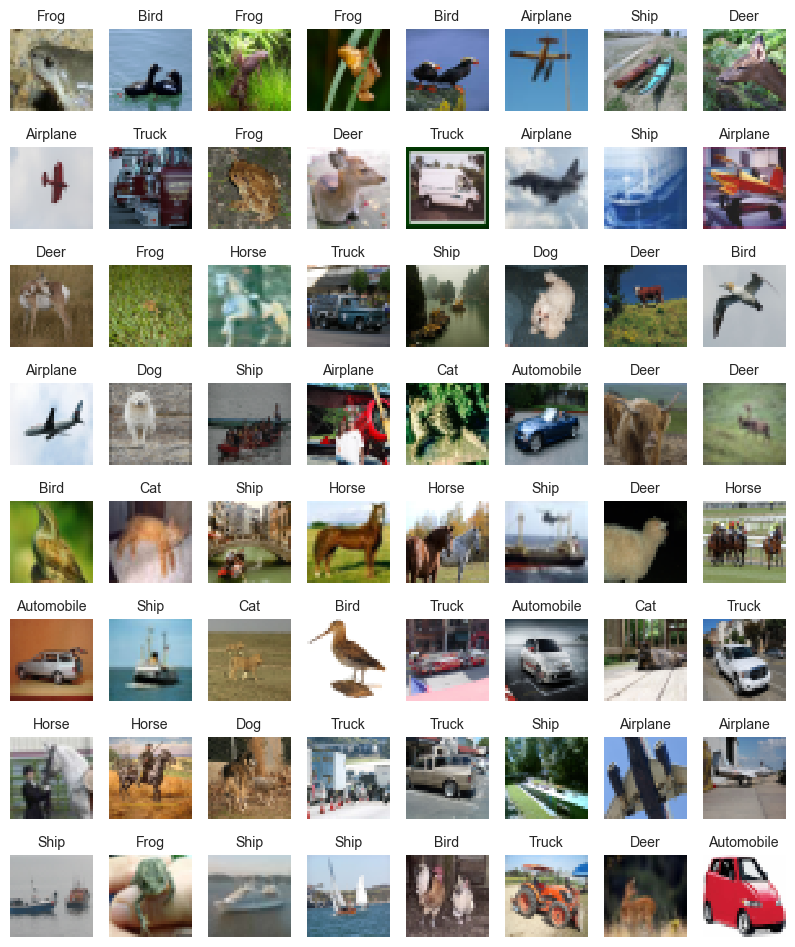

In [54]:
# lets display random 64 images
from PIL import Image
rand_indexes = np.random.randint(0, len(image_paths), 64)
num_rows, num_cols = 8, 8

with sns.axes_style("whitegrid"):
    sns.set(context = "notebook", font_scale = 0.85)

    plt.figure(figsize=(10, 12))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i+1)
        plt.axis("off")
        image_path = image_paths[rand_indexes[i]]
        # print(image_path, flush=True)
        label = f"{image_path}".split(os.path.sep)[-2] 
        image = Image.open(image_path)
        plt.imshow(image, cmap="Greys", interpolation="nearest")
        plt.title(label.title())

plt.show()

Found 90000 images belonging to 10 classes.


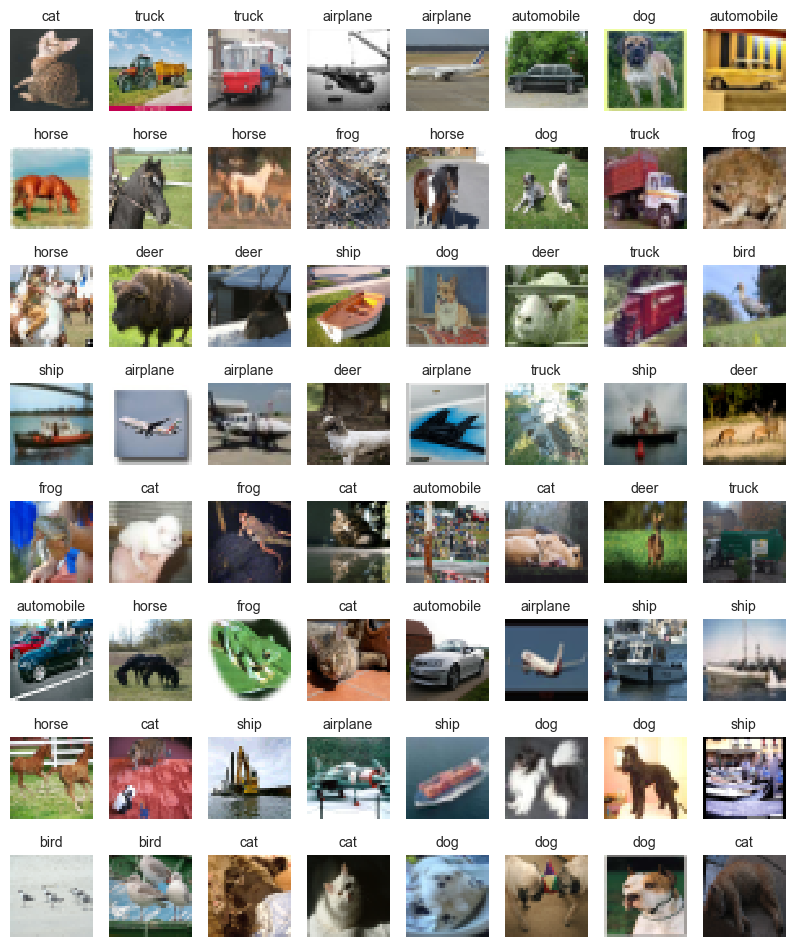

In [65]:
# another way to display sample images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_generator = ImageDataGenerator(rescale=1.0/255.0)

image_iter = image_generator.flow_from_directory(
    # from test images
    directory=CINCI10_EXTRACTED_LOCATION.joinpath("test").__str__(),
    # get 64 random images
    batch_size=64,
    target_size=(32, 32)   
)
num_rows, num_cols = 8, 8
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 
    'frog', 'horse', 'ship', 'truck'
]

for images, labels in image_iter:
    # print(labels)
    with sns.axes_style("whitegrid"):
        sns.set(context="notebook", font_scale=0.85)
        plt.figure(figsize=(10, 12))

        for i in range(num_rows * num_cols):
            plt.subplot(num_rows, num_cols, i + 1)
            plt.axis("off")
            plt.imshow(images[i], cmap="Greys", interpolation="nearest")
            plt.title(class_names[np.argmax(labels[i])])
    # stop after 1 batch
    break

In [ ]:
# using Tensorflow datasets to display images
image_dataset2 = tf.data.Dataset.list_file()